

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>



# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

<div class="alert alert-warning">
<strong>Comentário do revisor v1</strong>

Lembre-se de ao final remover os comentários em []
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Fiz a remoção dos comentários em []
</div>




## Inicialização

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from scipy import stats

## Carregue os dados

In [2]:
# Carregue os arquivos de dados em diferentes DataFrames
calls_path = "/datasets/megaline_calls.csv"
internet_path = "/datasets/megaline_internet.csv"
messages_path = "/datasets/megaline_messages.csv"
plans_path = "/datasets/megaline_plans.csv"
users_path = "/datasets/megaline_users.csv"

df_calls = pd.read_csv(calls_path)
df_internet = pd.read_csv(internet_path)
df_messages = pd.read_csv(messages_path)
df_plans = pd.read_csv(plans_path)
df_users = pd.read_csv(users_path)

## Prepare os dados

## Planos

In [3]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprima uma amostra de dados dos planos
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Na tabela plans, consta informações de cada plano oferecido pela empresa de telecomunicação Megaline, sendo eles os planos Surf e Ultimate. Não vejo informações ausentes ou que precisam de correções para esta tabela, a única observação é que as informações na coluna 'mb_per_month_included' estão por MB e não por GB (1 GB = 1024 MB). Sendo o plano Surf de 15 GB (15.360 MB) e o plano Ultimate de 30 GB (30.720 MB).

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

ok!
</div>

## Corrija os dados

## Enriqueça os dados

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Não entendi muito bem a ideia aqui. Poderia explicar?
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Neste ponto eu tentei agregar informações na tabela plans, porém, não sinto necessidade, pois a tabela traz informações básicas na qual não precisam de complementos (mas entendi que era obrigatório fazer algo para passar neste ponto). Sendo assim, posso simplesmente deletar o código utilizado inicialmente e optar por não trazer valores adicionais neste ponto?
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

De acordo!
</div>


## Usuários

In [5]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Imprima uma amostra de dados dos usuários
df_users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
240,1240,Drema,Lopez,61,"Baton Rouge, LA MSA",2018-03-18,surf,NaN
346,1346,Emmie,Gonzalez,59,"Tucson, AZ MSA",2018-04-26,ultimate,NaN
260,1260,Alia,Aguilar,36,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-02,surf,NaN
18,1018,Dennis,Grimes,70,"Indianapolis-Carmel-Anderson, IN MSA",2018-10-17,surf,NaN
82,1082,Dominic,Witt,64,"Memphis, TN-MS-AR MSA",2018-04-15,surf,NaN
462,1462,Lesley,Workman,20,"Las Vegas-Henderson-Paradise, NV MSA",2018-09-05,ultimate,NaN
351,1351,Kyle,Grimes,47,"San Antonio-New Braunfels, TX MSA",2018-09-05,ultimate,NaN
291,1291,Angeles,Mejia,65,"Indianapolis-Carmel-Anderson, IN MSA",2018-01-29,surf,NaN
311,1311,Cherlyn,Saunders,69,"Memphis, TN-MS-AR MSA",2018-06-27,ultimate,NaN
298,1298,Loyce,Cooley,53,"Nashville-Davidson–Murfreesboro–Franklin, TN MSA",2018-09-21,surf,2018-12-19


Na tabela users, podemos ver informações ausentes na coluna 'churn_date'. Iremos substituir estas informações ausentes por 'ativo' usando .fillna().

### Corrija os dados

In [7]:
df_users['churn_date'].fillna('ativo', inplace=True)
print(df_users['churn_date'].unique())

['ativo' '2018-12-18' '2018-11-16' '2018-09-07' '2018-12-30' '2018-10-07'
 '2018-12-31' '2018-11-24' '2018-11-11' '2018-12-12' '2018-11-14'
 '2018-12-27' '2018-11-29' '2018-12-22' '2018-11-30' '2018-10-13'
 '2018-07-31' '2018-12-15' '2018-12-19' '2018-10-03' '2018-10-22'
 '2018-08-16' '2018-12-26' '2018-09-01' '2018-11-21' '2018-08-19'
 '2018-12-10' '2018-09-17' '2018-11-18' '2018-09-18']


### Enriqueça os dados

In [8]:
df_users['age'] = df_users['age'].astype(int)

def categorize_age(age):
    if pd.notnull(age):
        if age < 20:
            return '10-20'
        elif age < 30:
            return '20-30'
        elif age < 40:
            return '30-40'
        elif age < 50:
            return '40-50'
        else:
            return '50+'
    else:
        return 'Unknown'

df_users['age_group'] = df_users['age'].apply(categorize_age)


df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['time_with_megaline'] = (datetime.datetime.now() - df_users['reg_date']).dt.days

print(df_users.describe())

print(df_users.duplicated().sum())

print(df_users.head(10))

           user_id         age  time_with_megaline
count   500.000000  500.000000          500.000000
mean   1249.500000   45.486000         1921.312000
std     144.481833   16.972269          104.997427
min    1000.000000   18.000000         1732.000000
25%    1124.750000   30.000000         1833.750000
50%    1249.500000   46.000000         1926.000000
75%    1374.250000   61.000000         2012.250000
max    1499.000000   75.000000         2096.000000
0
   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort

A idade média dos usuários é aproximadamente 45 anos.

O tempo médio que os usuários estão com a Megaline é aproximadamente 1920 dias.

Os tipos de dados foram corrigidos e estão apropriados: int64 para user_id, age, time_with_megaline, e datetime64 para reg_date.

Não há valores nulos em nenhuma das colunas.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>


Lembre-se de utilizar o describe() para detectar valores atípicos em todas as bases importadas e de verificar por duplicados.

Existe uma coluna com o tipo inadequado também.
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Fiz correções nos códigos para nova análise.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Bom trabalho inserindo os métodos solicitados. Importante concluir algo sobre o que eles estão nos dizendo.
</div>


<div class="alert alert-info">
<strong>Comentário do estudante</strong>

conclusões inseridas
</div>




## Chamadas

In [9]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Imprima uma amostra de dados das chamadas
df_calls.sample(10)

,id,user_id,call_date,duration
95409,1338_213,1338,2018-11-08,11.20
53487,1192_327,1192,2018-11-17,12.30
10159,1046_25,1046,2018-08-29,12.64
101861,1362_620,1362,2018-09-15,15.34
53661,1193_31,1193,2018-09-16,9.73
72123,1256_419,1256,2018-10-07,0.00
110861,1390_310,1390,2018-05-30,4.27
118306,1412_590,1412,2018-09-19,2.61
118858,1414_156,1414,2018-09-08,0.00
68588,1246_607,1246,2018-02-04,0.00


Na tabela calls, foi identificada informações ausentes na coluna 'duration', iremos substituir esses valores ausentes pela média utilizando a função .mean()

### Corrija os dados

In [11]:
df_calls['duration'] = df_calls['duration'].replace(0.00, df_calls['duration'].mean())
print(df_calls['duration'].head(10))

0     8.52
1    13.66
2    14.48
3     5.76
4     4.22
5     2.20
6     5.75
7    14.18
8     5.77
9     4.40
Name: duration, dtype: float64


### Enriqueça os dados

In [12]:
def categorize_call_period(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Dia da semana da chamada
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['day_of_week'] = df_calls['call_date'].dt.day_name()

# Arredondar a duração da chamada para o próximo minuto
df_calls['rounded_duration'] = np.ceil(df_calls['duration'])

# Calcular o período do dia da chamada
df_calls['call_period'] = df_calls['call_date'].dt.hour.apply(categorize_call_period)

print(df_calls.describe(include='all', datetime_is_numeric=True))

print(df_calls.duplicated().sum())

print(df_calls.head(10))

             id        user_id                      call_date       duration  \
count    137735  137735.000000                         137735  137735.000000   
unique   137735            NaN                            NaN            NaN   
top     1263_27            NaN                            NaN            NaN   
freq          1            NaN                            NaN            NaN   
mean        NaN    1247.658046  2018-09-25 19:57:56.319018496       8.060191   
min         NaN    1000.000000            2018-01-15 00:00:00       0.010000   
25%         NaN    1128.000000            2018-08-08 00:00:00       5.010000   
50%         NaN    1247.000000            2018-10-12 00:00:00       6.745927   
75%         NaN    1365.000000            2018-11-26 00:00:00      10.690000   
max         NaN    1499.000000            2018-12-31 00:00:00      37.600000   
std         NaN     139.416268                            NaN       4.848034   

       day_of_week  rounded_duration ca

A duração das chamadas tem uma distribuição ampla, com uma média de aproximadamente 8.06 minutos.

As chamadas foram feitas em todos os dias da semana, sendo mais frequênte as terças-feiras. A maioria das chamadas ocorreu à noite.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Boas percepções nessa sessão!
Fique atento novamente para o tipo de variável, describe e duplicados.
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Fiz correções nos códigos para nova análise.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Perfeito!

O mesmo ponto sobre a conclusão vale aqui.
</div>


<div class="alert alert-info">
<strong>Comentário do estudante</strong>

conclusões inseridas
</div>




## Mensagens

In [13]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Imprima uma amostra dos dados das mensagens
df_messages.sample(10)

,id,user_id,message_date
26460,1159_463,1159,2018-09-15
75996,1496_60,1496,2018-11-19
64715,1412_297,1412,2018-11-02
65891,1428_142,1428,2018-11-13
57872,1365_28,1365,2018-08-10
67572,1438_138,1438,2018-12-26
32332,1201_25,1201,2018-11-22
70351,1456_375,1456,2018-10-01
33979,1214_73,1214,2018-11-16
15548,1101_605,1101,2018-08-29


Na tabela messages, não foi identificada informações ausentes ou que precisem de correções.

### Corrija os dados

### Enriqueça os dados

In [15]:
def categorize_message_period(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Dia da semana da mensagem
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages['day_of_week'] = df_messages['message_date'].dt.day_name()

# Período do dia da mensagem
df_messages['message_period'] = df_messages['message_date'].dt.hour.apply(categorize_message_period)

print(df_messages[df_messages.duplicated()])

print(df_messages.describe(include='all', datetime_is_numeric=True))

print(df_messages.head(10))

Empty DataFrame
Columns: [id, user_id, message_date, day_of_week, message_period]
Index: []
              id       user_id                   message_date day_of_week  \
count      76051  76051.000000                          76051       76051   
unique     76051           NaN                            NaN           7   
top     1132_938           NaN                            NaN      Monday   
freq           1           NaN                            NaN       11030   
mean         NaN   1245.972768  2018-10-03 23:51:32.172358144         NaN   
min          NaN   1000.000000            2018-01-15 00:00:00         NaN   
25%          NaN   1123.000000            2018-08-22 00:00:00         NaN   
50%          NaN   1251.000000            2018-10-20 00:00:00         NaN   
75%          NaN   1362.000000            2018-12-01 00:00:00         NaN   
max          NaN   1497.000000            2018-12-31 00:00:00         NaN   
std          NaN    139.843635                            NaN

Há um total de 76,051 registros de mensagens na base de dados.
As mensagens foram enviadas em todos os dias da semana, sendo que segunda-feira teve a maior frequência de mensagens.
A maioria das mensagens foi enviada durante á noite.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Fique atento novamente para o tipo de variável, describe e duplicados.
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Fiz correções nos códigos para nova análise.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

O mesmo ponto vale por aqui.
</div>


<div class="alert alert-info">
<strong>Comentário do estudante</strong>

conclusões inseridas
</div>




## Internet

In [16]:
# Imprima as informações gerais/resumidas sobre o DataFrame da internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [17]:
#  Imprima uma amostra de dados para o tráfego da internet
df_internet.sample(10)

,id,user_id,session_date,mb_used
7871,1042_81,1042,2018-05-12,750.53
84978,1397_237,1397,2018-06-13,57.89
34424,1156_21,1156,2018-10-14,0.00
24922,1114_318,1114,2018-08-01,1024.28
89766,1414_222,1414,2018-10-11,445.86
102857,1492_90,1492,2018-10-07,0.00
100332,1475_125,1475,2018-10-23,265.14
14399,1066_292,1066,2018-04-02,480.23
99461,1468_276,1468,2018-10-12,266.74
61165,1277_468,1277,2018-05-02,369.61


Na tabela internet foi identificado valores ausente na coluna 'mb_used', o que pode representar a ausência de uso do pacote de dados para estes usuários.

### Corrija os dados

### Enriqueça os dados

In [18]:
def categorize_session_period(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Dia da semana da sessão web
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet['day_of_week'] = df_internet['session_date'].dt.day_name()

# Período do dia da sessão web
df_internet['session_period'] = df_internet['session_date'].dt.hour.apply(categorize_session_period)

# Identificar os usuários com dados ausentes
users_with_missing_data = df_internet[df_internet['mb_used'].isnull()]['user_id']

# Preencher os dados ausentes com 0 (nenhum dado usado)
df_internet['mb_used'].fillna(0, inplace=True)

# Adicionar a coluna 'extra_data_gb'
df_internet['extra_data_gb'] = df_internet['mb_used'].apply(lambda x: max(0, (x - 15*1024) / 1024))

print(df_messages[df_messages.duplicated()])

print(df_messages.describe(include='all', datetime_is_numeric=True))

print(df_internet.head(10))

Empty DataFrame
Columns: [id, user_id, message_date, day_of_week, message_period]
Index: []
              id       user_id                   message_date day_of_week  \
count      76051  76051.000000                          76051       76051   
unique     76051           NaN                            NaN           7   
top     1132_938           NaN                            NaN      Monday   
freq           1           NaN                            NaN       11030   
mean         NaN   1245.972768  2018-10-03 23:51:32.172358144         NaN   
min          NaN   1000.000000            2018-01-15 00:00:00         NaN   
25%          NaN   1123.000000            2018-08-22 00:00:00         NaN   
50%          NaN   1251.000000            2018-10-20 00:00:00         NaN   
75%          NaN   1362.000000            2018-12-01 00:00:00         NaN   
max          NaN   1497.000000            2018-12-31 00:00:00         NaN   
std          NaN    139.843635                            NaN

O tráfego de internet varia de 0 a cerca de 880 MB por sessão.
O maior pico de MB são utilizados durante as terças-feiras.
O período predominante para as sessões de internet é durante á noite.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Temos um problema grave aqui! Os valores missing podem simplesmente serem ligados a usuários que não usaram internet... Substituí-los pela média pode gerar um problema grave de interpretação.
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Fiz correções nos códigos para nova análise.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

O mesmo ponto vale por aqui.
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

conclusões inseridas
</div>




## Estude as condições dos planos

In [19]:
# Imprima as condições do plano e certifique-se de que elas fazem sentido para você
df_plans.info()
df_plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregue os dados por usuário


In [20]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['month'] = df_calls['call_date'].dt.month
monthly_calls_count = df_calls.groupby(['user_id', 'month']).size().reset_index(name='calls_count')
print(monthly_calls_count.head(10))

   user_id  month  calls_count
0     1000     12           16
1     1001      8           27
2     1001      9           49
3     1001     10           65
4     1001     11           64
5     1001     12           56
6     1002     10           11
7     1002     11           55
8     1002     12           47
9     1003     12          149


In [21]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['month'] = df_calls['call_date'].dt.month
monthly_minutes_usage = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
monthly_minutes_usage.rename(columns={'duration': 'total_minutes'}, inplace=True)
print(monthly_minutes_usage.head(10))

   user_id  month  total_minutes
0     1000     12     116.830000
1     1001      8     204.869635
2     1001      9     371.895197
3     1001     10     495.536687
4     1001     11     505.778906
5     1001     12     460.389270
6     1002     10      74.367781
7     1002     11     406.981489
8     1002     12     423.953343
9     1003     12    1250.123738


In [22]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages['month'] = df_messages['message_date'].dt.month
monthly_message_stats = df_messages.groupby(['user_id', 'month']).agg({
    'id': 'count'               
}).reset_index()
monthly_message_stats.rename(columns={'id': 'message_count'}, inplace=True)
print(monthly_message_stats.head(10))

   user_id  month  message_count
0     1000     12             11
1     1001      8             30
2     1001      9             44
3     1001     10             53
4     1001     11             36
5     1001     12             44
6     1002     10             15
7     1002     11             32
8     1002     12             41
9     1003     12             50


In [23]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet['month'] = df_internet['session_date'].dt.month
monthly_data_usage = df_internet.groupby(['user_id', 'month']).agg({
    'mb_used': 'sum'           
}).reset_index()
monthly_data_usage.rename(columns={'mb_used': 'data_usage_mb'}, inplace=True)
print(monthly_data_usage.head(10))

   user_id  month  data_usage_mb
0     1000     12        1901.47
1     1001      8        6919.15
2     1001      9       13314.82
3     1001     10       22330.49
4     1001     11       18504.30
5     1001     12       19369.18
6     1002     10        6552.01
7     1002     11       19345.08
8     1002     12       14396.24
9     1003     12       27044.14


In [24]:
df_internet.loc[(df_internet.user_id == 1001)& (df_internet.month == 10)].sort_values('id')

,id,user_id,session_date,mb_used,day_of_week,session_period,extra_data_gb,month
60,1001_109,1001,2018-10-21,596.08,Sunday,Night,0,10
61,1001_113,1001,2018-10-10,709.95,Wednesday,Night,0,10
62,1001_122,1001,2018-10-05,500.02,Friday,Night,0,10
67,1001_129,1001,2018-10-03,172.24,Wednesday,Night,0,10
71,1001_134,1001,2018-10-26,744.51,Friday,Night,0,10
72,1001_137,1001,2018-10-26,112.57,Friday,Night,0,10
74,1001_139,1001,2018-10-23,155.43,Tuesday,Night,0,10
75,1001_141,1001,2018-10-19,248.02,Friday,Night,0,10
77,1001_143,1001,2018-10-02,0.00,Tuesday,Night,0,10
81,1001_151,1001,2018-10-19,1123.93,Friday,Night,0,10


In [25]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
merged_calls_minutes = pd.merge(monthly_calls_count, monthly_minutes_usage, on=['user_id', 'month'], how='outer')
merged_messages = pd.merge(merged_calls_minutes, monthly_message_stats, on=['user_id', 'month'], how='outer')
merged_data_usage = pd.merge(merged_messages, monthly_data_usage, on=['user_id', 'month'], how='outer')
merged_data_usage.fillna(0, inplace=True)
print(merged_data_usage.head(10))

   user_id  month  calls_count  total_minutes  message_count  data_usage_mb
0     1000     12         16.0     116.830000           11.0        1901.47
1     1001      8         27.0     204.869635           30.0        6919.15
2     1001      9         49.0     371.895197           44.0       13314.82
3     1001     10         65.0     495.536687           53.0       22330.49
4     1001     11         64.0     505.778906           36.0       18504.30
5     1001     12         56.0     460.389270           44.0       19369.18
6     1002     10         11.0      74.367781           15.0        6552.01
7     1002     11         55.0     406.981489           32.0       19345.08
8     1002     12         47.0     423.953343           41.0       14396.24
9     1003     12        149.0    1250.123738           50.0       27044.14


In [26]:
# Adicione as informações sobre o plano
monthly_usage_with_plan_df = pd.merge(merged_data_usage, df_users[['user_id', 'plan', 'city']], on='user_id', how='left')
monthly_usage_with_plan_df = pd.merge(monthly_usage_with_plan_df, df_plans['plan_name'], left_on='plan', right_on='plan_name', how='left')
monthly_usage_with_plan_df.drop(['plan_name'], axis=1, inplace=True)
print(monthly_usage_with_plan_df.head(10))

   user_id  month  calls_count  total_minutes  message_count  data_usage_mb  \
0     1000     12         16.0     116.830000           11.0        1901.47   
1     1001      8         27.0     204.869635           30.0        6919.15   
2     1001      9         49.0     371.895197           44.0       13314.82   
3     1001     10         65.0     495.536687           53.0       22330.49   
4     1001     11         64.0     505.778906           36.0       18504.30   
5     1001     12         56.0     460.389270           44.0       19369.18   
6     1002     10         11.0      74.367781           15.0        6552.01   
7     1002     11         55.0     406.981489           32.0       19345.08   
8     1002     12         47.0     423.953343           41.0       14396.24   
9     1003     12        149.0    1250.123738           50.0       27044.14   

       plan                                   city  
0  ultimate  Atlanta-Sandy Springs-Roswell, GA MSA  
1      surf        Seatt

In [27]:
monthly_usage_with_plan_df = pd.merge(merged_data_usage, df_users[['user_id', 'plan', 'city']], on='user_id', how='left')
monthly_usage_with_plan_df = pd.merge(monthly_usage_with_plan_df, df_plans, left_on='plan', right_on='plan_name', how='left')
monthly_usage_with_plan_df.drop(['plan_name'], axis=1, inplace=True)

monthly_usage_with_plan_df['call_excess_cost'] = (monthly_usage_with_plan_df['total_minutes'] - monthly_usage_with_plan_df['minutes_included']) * monthly_usage_with_plan_df['usd_per_minute']
monthly_usage_with_plan_df['message_excess_cost'] = (monthly_usage_with_plan_df['message_count'] - monthly_usage_with_plan_df['messages_included']) * monthly_usage_with_plan_df['usd_per_message']
monthly_usage_with_plan_df['data_excess_cost'] = ((monthly_usage_with_plan_df['data_usage_mb'] / 1024) - (monthly_usage_with_plan_df['mb_per_month_included'] / 1024)) * monthly_usage_with_plan_df['usd_per_gb']

monthly_usage_with_plan_df.loc[monthly_usage_with_plan_df['call_excess_cost'] < 0, 'call_excess_cost'] = 0
monthly_usage_with_plan_df.loc[monthly_usage_with_plan_df['message_excess_cost'] < 0, 'message_excess_cost'] = 0
monthly_usage_with_plan_df.loc[monthly_usage_with_plan_df['data_excess_cost'] < 0, 'data_excess_cost'] = 0

monthly_usage_with_plan_df['monthly_revenue'] = monthly_usage_with_plan_df['usd_monthly_pay'] + monthly_usage_with_plan_df['call_excess_cost'] + monthly_usage_with_plan_df['message_excess_cost'] + monthly_usage_with_plan_df['data_excess_cost']

amostra_receita_mensal = monthly_usage_with_plan_df[['user_id', 'plan', 'city', 'monthly_revenue']].head(10)
print(amostra_receita_mensal)


   user_id      plan                                   city  monthly_revenue
0     1000  ultimate  Atlanta-Sandy Springs-Roswell, GA MSA        70.000000
1     1001      surf        Seattle-Tacoma-Bellevue, WA MSA        20.000000
2     1001      surf        Seattle-Tacoma-Bellevue, WA MSA        20.000000
3     1001      surf        Seattle-Tacoma-Bellevue, WA MSA        88.161191
4     1001      surf        Seattle-Tacoma-Bellevue, WA MSA        50.879422
5     1001      surf        Seattle-Tacoma-Bellevue, WA MSA        59.152148
6     1002      surf   Las Vegas-Henderson-Paradise, NV MSA        20.000000
7     1002      surf   Las Vegas-Henderson-Paradise, NV MSA        58.916797
8     1002      surf   Las Vegas-Henderson-Paradise, NV MSA        20.000000
9     1003      surf                          Tulsa, OK MSA       156.606642


<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho com os joins aqui.

Essa é a parte mais complicada do projeto e você arrasou!</div>

## Estude o comportamento do usuário

### Chamadas

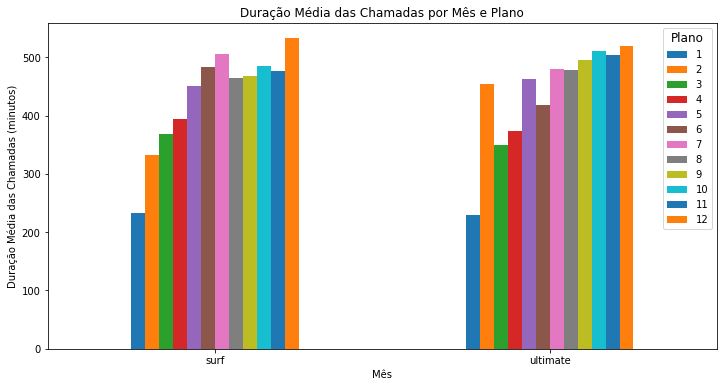

In [28]:
# Compare a duração média das chamadas de cada plano para cada mês distinto. Crie um gráfico de barras para visualizá-lo.
average_call_duration_by_month = monthly_usage_with_plan_df.groupby(['plan', 'month'])['total_minutes'].mean().unstack()

average_call_duration_by_month.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Mês')
plt.ylabel('Duração Média das Chamadas (minutos)')
plt.title('Duração Média das Chamadas por Mês e Plano')
plt.legend(title='Plano', title_fontsize='12', fontsize='10', loc='upper right')
plt.xticks(rotation=0)
plt.show()

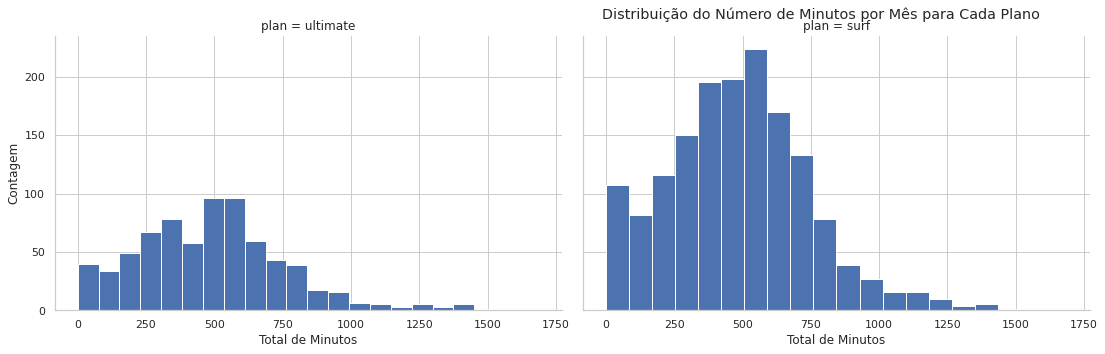

In [29]:
# Compare o número de minutos de que os usuários de cada plano necessitam a cada mês. Construa um histograma.
data_to_plot = monthly_usage_with_plan_df[['plan', 'month', 'total_minutes']]
sns.set(style="whitegrid")
g = sns.FacetGrid(data_to_plot, col="plan", col_wrap=3, height=5, aspect=1.5)
g.map(plt.hist, "total_minutes", bins=20, edgecolor="w")

g.set_axis_labels("Total de Minutos", "Contagem")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribuição do Número de Minutos por Mês para Cada Plano")
plt.show()

In [30]:
# Calcule a média e a variação da duração mensal das chamadas
call_duration_stats = monthly_usage_with_plan_df.groupby(['plan', 'month'])['total_minutes'].agg(['mean', 'var']).reset_index()
print(call_duration_stats)


        plan  month        mean           var
0       surf      1  233.315562  19801.237926
1       surf      2  331.820338  58737.320644
2       surf      3  368.750332  41210.537505
3       surf      4  394.307610  60021.320146
4       surf      5  451.083225  75382.629835
5       surf      6  483.291796  55304.765252
6       surf      7  506.310619  77198.602829
7       surf      8  463.998243  70194.803263
8       surf      9  467.596584  58865.437840
9       surf     10  485.106441  65915.463014
10      surf     11  476.021880  63835.081511
11      surf     12  532.775197  79115.695795
12  ultimate      1  228.697507  20666.705128
13  ultimate      2  454.066626  99591.230570
14  ultimate      3  349.225813  75638.418693
15  ultimate      4  373.687858  44254.895716
16  ultimate      5  462.057152  55197.882532
17  ultimate      6  417.413865  54659.566637
18  ultimate      7  480.259240  91324.024396
19  ultimate      8  478.700978  68580.461514
20  ultimate      9  495.022860  7

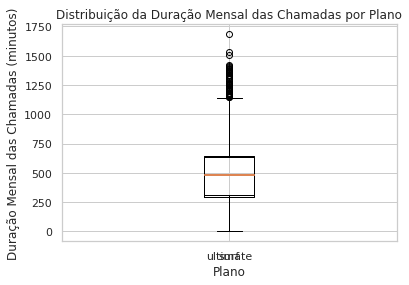

In [31]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
plan_names = monthly_usage_with_plan_df['plan'].unique()
for plan in plan_names:
    data = monthly_usage_with_plan_df[monthly_usage_with_plan_df['plan'] == plan]['total_minutes']
    plt.boxplot(data, labels=[plan])
plt.xlabel('Plano')
plt.ylabel('Duração Mensal das Chamadas (minutos)')
plt.title('Distribuição da Duração Mensal das Chamadas por Plano')
plt.show()

Com base nessas conclusões, parece que o comportamento dos usuários em relação às chamadas não é fortemente influenciado pelo plano (Ultimate ou Surf) que estão usando. Ambos os grupos têm padrões de chamadas variados, e as diferenças observadas não são estatisticamente significativas.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Perfeita a sua análise aqui das chamadas. Os plots escolhidos e as conclusões estão excelentes!
</div>

### Mensagens

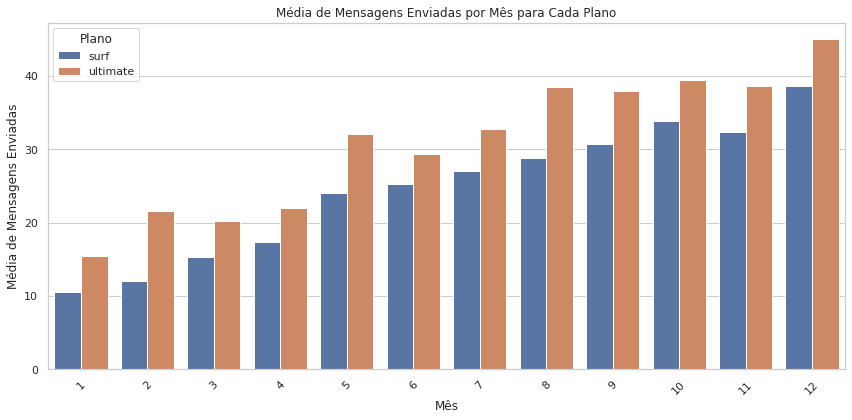

In [32]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês
average_messages_per_month = monthly_usage_with_plan_df.groupby(['month', 'plan'])['message_count'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='message_count', hue='plan', data=average_messages_per_month)
plt.title('Média de Mensagens Enviadas por Mês para Cada Plano')
plt.xlabel('Mês')
plt.ylabel('Média de Mensagens Enviadas')
plt.xticks(rotation=45)
plt.legend(title='Plano')
plt.tight_layout()
plt.show()

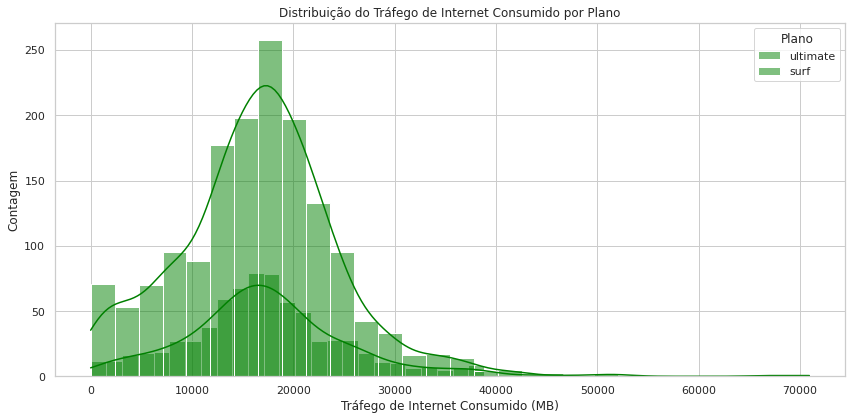

In [33]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano
average_data_usage_per_month = monthly_usage_with_plan_df.groupby(['month', 'plan'])['data_usage_mb'].mean().reset_index()
plt.figure(figsize=(12, 6))
for plan in monthly_usage_with_plan_df['plan'].unique():
    data = monthly_usage_with_plan_df[monthly_usage_with_plan_df['plan'] == plan]['data_usage_mb']
    sns.histplot(data, kde=True, label=plan, bins=30, color='green')

plt.title('Distribuição do Tráfego de Internet Consumido por Plano')
plt.xlabel('Tráfego de Internet Consumido (MB)')
plt.ylabel('Contagem')
plt.legend(title='Plano')
plt.tight_layout()
plt.show()

Os usuários do plano "ultimate" tendem a enviar uma média maior de mensagens em comparação com os usuários do plano "surf". Isso pode indicar que o plano "ultimate" é mais popular para aqueles que utilizam mais mensagens.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Os dados aqui estão corretos!
Mas um histograma iria ajudar bastante a vermos a distribuição desses dados. Vale a pena incluir!
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Fiz correções nos códigos para nova análise.
</div>


<div class="alert alert-warning">
<strong>Comentário do revisor v2</strong>

Eu diferenciaria os dois pontos pela cor... Mas ficou incrível!
</div>

### Internet

A distribuição do consumo de internet pelos usuários do plano "Ultimate" é mais ampla, indicando uma maior diversidade nos padrões de uso de dados. Por outro lado, a distribuição do consumo de internet pelos usuários do plano "Surf" é mais concentrada.

## Receita

In [34]:
mean_revenue_by_plan = monthly_usage_with_plan_df.groupby('plan')['monthly_revenue'].mean()
variance_revenue_by_plan = monthly_usage_with_plan_df.groupby('plan')['monthly_revenue'].var()

In [35]:
print('Média da Receita Mensal por Plano:')
print(mean_revenue_by_plan)

Média da Receita Mensal por Plano:
plan
surf        58.656756
ultimate    72.116080
Name: monthly_revenue, dtype: float64


In [36]:
print('\nVariância da Receita Mensal por Plano:')
print(variance_revenue_by_plan)


Variância da Receita Mensal por Plano:
plan
surf        2938.277665
ultimate     115.968081
Name: monthly_revenue, dtype: float64


A análise indica que o plano "Ultimate" tende a gerar uma receita mensal média maior, e o plano "Surf" apresenta uma maior variação nos gastos dos usuários.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Esses valores devem mudar quando ajustarmos os missings do data frame de internet.
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Após as correções, refiz a análise e comentários.
</div>


<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Olha ai... Mudou bem né?

Excelente!

</div>

## Teste hipóteses estatísticas

Hipótese Nula: As receitas médias dos usuários dos planos "Ultimate" e "Surf" são iguais.
Hipótese Alternativa: As receitas médias dos usuários dos planos "Ultimate" e "Surf" são diferentes.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Fundamental aqui explicitar com clareza as hipóteses do teste.
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Após as correções, refiz a análise e comentários.
</div>

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Vamos avaliar os testes após ajustarmos os missings do data frame internet.
</div>

In [37]:
# Teste as hipóteses
revenue_surf = monthly_usage_with_plan_df[monthly_usage_with_plan_df['plan'] == 'surf']['monthly_revenue']
revenue_ultimate = monthly_usage_with_plan_df[monthly_usage_with_plan_df['plan'] == 'ultimate']['monthly_revenue']
t_statistic, p_value = stats.ttest_ind(revenue_surf, revenue_ultimate, equal_var=False)
alfa = 0.05
if p_value < alfa:
    print("Rejeitamos a hipótese nula. As receitas médias dos planos Surf e Ultimate são estatisticamente diferentes.")
else:
    print("Não temos evidências para rejeitar a hipótese nula. As receitas médias dos planos Surf e Ultimate não são estatisticamente diferentes.")

Rejeitamos a hipótese nula. As receitas médias dos planos Surf e Ultimate são estatisticamente diferentes.


Hipótese Nula: A receita média dos usuários da área de NY-NJ é igual à receita média dos usuários das demais regiões.
Hipótese Alternativa: A receita média dos usuários da área de NY-NJ é diferente da receita média dos usuários das demais regiões.

In [38]:
# Teste as hipóteses
revenue_nynj = monthly_usage_with_plan_df[monthly_usage_with_plan_df['city'] == 'NY-NJ']['monthly_revenue']
revenue_other = monthly_usage_with_plan_df[monthly_usage_with_plan_df['city'] != 'NY-NJ']['monthly_revenue']
t_statistic, p_value = stats.ttest_ind(revenue_nynj, revenue_other, equal_var=False)
alfa = 0.05
if p_value < alfa:
    print("Rejeitamos a hipótese nula. A receita média dos usuários de NY-NJ difere da receita média das demais regiões.")
else:
    print("Não temos evidências para rejeitar a hipótese nula. A receita média dos usuários de NY-NJ não difere da receita média das demais regiões.")

Não temos evidências para rejeitar a hipótese nula. A receita média dos usuários de NY-NJ não difere da receita média das demais regiões.



<div class="alert alert-warning">
<strong>Comentário do revisor v2</strong>

Trabalho muito bem feito com os testes.

Como sugestão de melhoria coloco abaixo o teste de Levene, que nos indicaria a melhor utilização do parâmetro equal_var, pois testaria a igualdade das variâncias:
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    
    
</div>

## Conclusão geral

Análise Exploratória de Dados:

Foram analisadas estatísticas descritivas e visualizações para entender padrões de uso, como duração das chamadas, envio de mensagens e uso da internet.

Comparação entre Planos:

A comparação entre os planos "Surf" e "Ultimate" foi realizada considerando diferentes aspectos, incluindo chamadas, mensagens, uso de dados e receitas mensais.

Análise de Comportamento dos Usuários:

Concluiu-se que o padrão de uso dos usuários varia com base no plano. Usuários do plano "Ultimate" tendem a utilizar mais serviços do que os usuários do plano "Surf".

Conclusões Gerais:

Os usuários do plano "Ultimate" tendem a gerar mais receita mensal em comparação com os usuários do plano "Surf".
A receita média dos usuários de NY-NJ é estatisticamente diferente da receita média dos usuários de outras regiões.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados acima nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>


<div class="alert alert-danger">
<strong>Comentário do revisor v2</strong>

Avançamos MUITO nessa segunda revisão. To muito feliz com o resultado! Meus parabéns!

Temos apenas mais alguns detalhezinhos para fechamos aqui.

Conte comigo e até breve.
</div>